In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import plot_confusion_matrix

In [32]:
data = pd.read_csv("/cxldata/projects/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
data.shape

(284807, 31)

##### summary

In [34]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Checking for missing datasets

In [35]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### store class columns into X

In [36]:
X = data.loc[:, data.columns !='Class']

##### store class values into Y

In [37]:
y = data.loc[:, data.columns =='Class']

#### checking if the data set is balance 

In [38]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


#### Calculating the percentage of fraud and non fraud detection transactions

In [39]:
print('Valid Transaction', round(data['Class'].value_counts()[0]/len(data)*100,2), '% of the dataset')
print('Fraudulent Transaction', round(data['Class'].value_counts()[1]/len(data)*100,2), '% of the dataset')

Valid Transaction 99.83 % of the dataset
Fraudulent Transaction 0.17 % of the dataset


##### assigning color to the fraud and valid transaction

In [40]:
color = ['blue', 'red']

##### plotting the graph

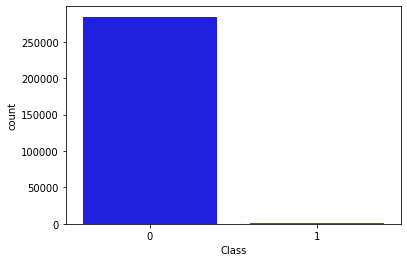

In [41]:
sns.countplot('Class', data=data, palette=color)

##### splitting the dataset into train and test

In [42]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##### Number of transction in X_train y_train that is valid and Fraudalent

In [43]:
print("Transaction in X_train dataset: ", X_train_full.shape)
print("Transaction classes in y_train dataset: ", y_train_full.shape)

Transaction in X_train dataset:  (227845, 30)
Transaction classes in y_train dataset:  (227845, 1)


#####  Number of transaction in X and Y test dataset that is valid and fraudalent

In [44]:
print("Transaction in X_test dataset: ", X_test.shape)
print("Transaction class in y_test dataset: ", y_test.shape)

Transaction in X_test dataset:  (56962, 30)
Transaction class in y_test dataset:  (56962, 1)


##### Feature scalling for balancing the data set

In [45]:
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

In [46]:
X_train_full['normAmount'] = scaler_amount.fit_transform(X_train_full['Amount'].values.reshape(-1, 1))
X_test['normAmount'] = scaler_amount.fit_transform(X_test['Amount'].values.reshape(-1, 1))

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
X_train_full['normTime'] = scaler_time.fit_transform(X_train_full['Time'].values.reshape(-1, 1))
X_test['normTime'] = scaler_time.fit_transform(X_test['Time'].values.reshape(-1, 1))

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
X_train_full = X_train_full.drop(['Amount', 'Time'], axis = 1)
X_test = X_test.drop(['Amount', 'Time'], axis = 1)

In [49]:
X_train_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
68806,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,-0.816909,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.305116,-0.877510
40018,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,-0.014495,...,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,-0.254237,-1.153085
250360,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,0.007083,...,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,-0.329508,1.263832
234820,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,-0.478188,...,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,-0.338982,1.122044
10001,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,0.889521,...,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,-0.342046,-1.680363


##### In other to prevent overfitting and bias in our result we balance the dataset by using SMOTE method

In [50]:
print("Before over_sampling: \n", y_train_full['Class'].value_counts)

Before over_sampling: 
 <bound method IndexOpsMixin.value_counts of 68806     0
40018     0
250360    0
234820    0
10001     0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 227845, dtype: int64>


In [51]:
sm = SMOTE()

##### Balancing the datasets

In [52]:
X_train_res, y_train_res = sm.fit_sample(X_train_full, y_train_full['Class'])

###### Checking if the dataset is now balance between the Fraudalent and Normal Transactions

In [53]:
print("After over_sampling:\n", y_train_res.value_counts)

After over_sampling:
 <bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
454903    1
454904    1
454905    1
454906    1
454907    1
Name: Class, Length: 454908, dtype: int64>


#### Training the Classification Algorithm using LogisticRegression

##### C is the regularization parameter, and penalty is the norm used in the penalization

In [54]:
parameters = {'penalty':['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#### LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)

##### fitting the classifier

In [57]:
klassifier = clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    9.9s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:  2.4min finished


In [58]:
print(klassifier.best_params_)

{'C': 100, 'penalty': 'l2'}


In [59]:
lr_gridcv_best = clf.best_estimator_

#### Predicting lr_grid_search on test dataset

In [61]:
y_test_pred = lr_gridcv_best.predict(X_test)

##### Confusion matrix function

In [62]:
cmf = confusion_matrix(y_test, y_test_pred)

##### Calculating the recall test data predictions

In [63]:
print("Recall metric in the test dataset:", (cmf[1,1]/(cmf[1,0]+cmf[1,1] )))

Recall metric in the test dataset: 0.9405940594059405


In [64]:
y_train_pre = lr_gridcv_best.predict(X_train_res)

In [65]:
cmf = confusion_matrix(y_train_res, y_train_pre)

##### Calculating the recall resampled train datasetpredictions by the best model

In [66]:
print("Recall metric in the train dataset:", (cmf[1,1]/(cmf[1,0]+cmf[1,1] )))

Recall metric in the train dataset: 0.9139210565652836


#### Visualizing the confusion matrix

In [67]:
class_names = ["Not Fraud", "Fraud"]

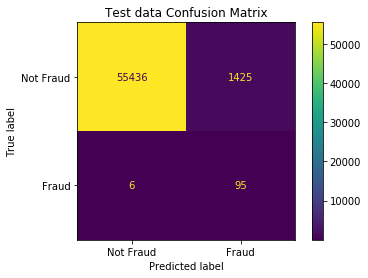

In [68]:
plot_confusion_matrix(klassifier, X_test, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

In [69]:
y_klassifier = klassifier.decision_function(X_test)

#### Threshold of False positive rate and True positive rate

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_klassifier)

#### Calculating the area under curve for FPR and TPR

In [73]:
roc_auc = auc(fpr, tpr)

In [74]:
print("ROC_AUC", roc_auc)

ROC_AUC 0.986809243524377


#### Visualizing the roc and auc curve 

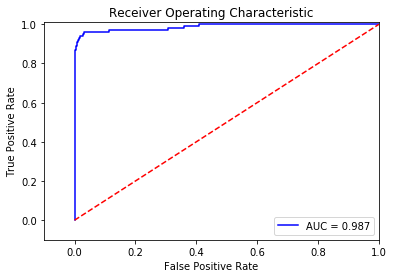

In [75]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Summary
###### We have first loaded the data, explored it, and checked for any null values. While exploring, we found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.  It is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. We could either undersample or oversample the data to achieve a balance between the class-wise data samples. We have split the data into train and test parts, in order to prevent any data leakage and to keep the test data untouched, before oversampling. We have scaled the Amount and Time features using StandardScaler. We then applied the SMOTE technique to oversample the train data and formed a new dataset with the thus obtained over-sampled datapoints. We used the GridSearch method with different parameter values, trained logistic regression classifiers with the different combinations of these parameters, and got the best logistic regression classifier which yields the least loss on the over-sampled data-set. All this mechanism is internally implemented by GridSearchCV of sklearn. We then used the best estimator thus obtained to evaluate its performance on the unseen test data. We calculated the recall, confusion-matrix and roc-auc scores.